# Follow Point Computation for Segmentation

In [1091]:
from cv2_plt_imshow import cv2_plt_imshow
import cv2
import numpy as np
image_num="000043"

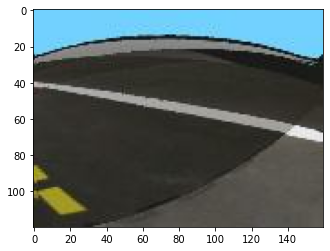

In [1092]:
img = cv2.imread(f"logs/segmentation_results/{image_num}_image.png")
cv2_plt_imshow(img)

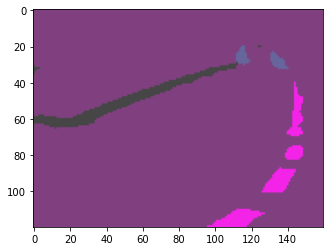

In [1071]:
color_seg = cv2.imread(f"logs/segmentation_results/{image_num}_prediction.png")
cv2_plt_imshow(color_seg)

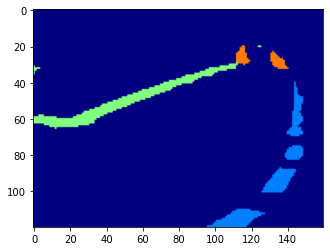

In [1072]:
seg = cv2.imread(f"logs/segmentation_results/{image_num}_raw_prediction.png",cv2.IMREAD_GRAYSCALE)
yellow = (seg==1).astype(np.uint8)
white = (seg==2).astype(np.uint8)
cv2_plt_imshow(cv2.applyColorMap(seg*64, cv2.COLORMAP_JET))

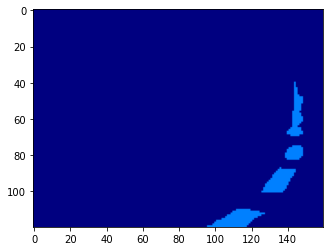

In [1073]:
cv2_plt_imshow(cv2.applyColorMap(yellow*64, cv2.COLORMAP_JET))

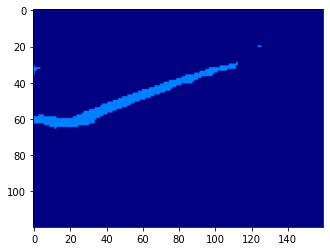

In [1074]:
cv2_plt_imshow(cv2.applyColorMap(white*64, cv2.COLORMAP_JET))

In [1075]:
contours_yellow,hierarchy = cv2.findContours(yellow, 1, 2)
yellow_points=None
if len(contours_yellow)>0:
    yellow_points = np.vstack(contours_yellow).reshape(-1,2)
    yellow_points[:,1] = -yellow_points[:,1] + white.shape[0]

In [1076]:
contours_white,hierarchy = cv2.findContours(white, 1, 2)
#contours_white[:,1] = -contours_white[:,1]
white_points = np.vstack(contours_white).reshape(-1,2)
white_points[:,1] = -white_points[:,1] + white.shape[0]

In [1077]:
white_points_l=white_points[white_points[:,0]<80]
white_points_r=white_points[white_points[:,0]>80]

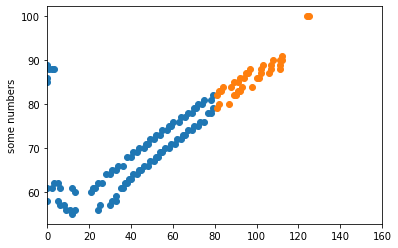

In [1078]:
import matplotlib.pyplot as plt
plt.scatter(white_points_l[:,0],white_points_l[:,1])
plt.scatter(white_points_r[:,0],white_points_r[:,1])
plt.ylabel('some numbers')
plt.xlim(0, 160)
#plt.ylim(-120, 0)
plt.show()

In [1079]:
import numpy as np
from matplotlib import pyplot as plt
from time import time
from sklearn import linear_model, datasets

np.random.shuffle(white_points_l)
white_points_l_ss = white_points_l[0:30]

X = white_points_l_ss[:,0].reshape(-1,1)
y = -white_points_l_ss[:,1]


#X.reshape(-1,1).shape

In [1080]:
def regress_and_show(X,y):
    lr = linear_model.LinearRegression()
    lr.fit(X, y)
    # Robustly fit linear model with RANSAC algorithm
    ransac = linear_model.RANSACRegressor()
    start = time()
    ransac.fit(X, y)
    end = time()
    print(end-start)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    
    # Predict data of estimated models
    line_X = np.arange(X.min(), X.max())[:, np.newaxis]
    line_y = lr.predict(line_X)
    line_y_ransac = ransac.predict(line_X)
    print(f"Parameters: {ransac.get_params()}")
    # Compare estimated coefficients
    print("Estimated coefficients (true, linear regression, RANSAC):")
    print(coef, lr.coef_, ransac.estimator_.coef_)
    
    lw = 2
    plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
                label='Inliers')
    plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
                label='Outliers')
    plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
             label='RANSAC regressor')
    plt.legend(loc='lower right')
    plt.xlabel("Input")
    plt.ylabel("Response")
    plt.xlim(0, 160)
    plt.ylim(0, 120)
    plt.show()
    return ransac.estimator_.coef_, ransac.estimator_.intercept_

0.015840530395507812
Parameters: {'base_estimator': None, 'is_data_valid': None, 'is_model_valid': None, 'loss': 'absolute_loss', 'max_skips': inf, 'max_trials': 100, 'min_samples': None, 'random_state': None, 'residual_threshold': None, 'stop_n_inliers': inf, 'stop_probability': 0.99, 'stop_score': inf}
Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [0.2070284] [0.32201407]


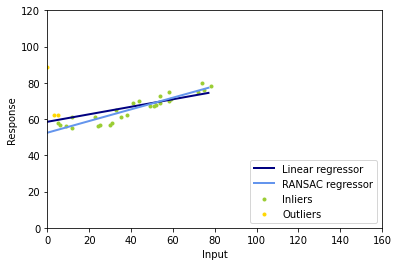

(array([0.32201407]), 52.486685184090774)

In [1081]:
np.random.shuffle(white_points_l)
white_points_l_ss = white_points_l[0:30]

X = white_points_l_ss[:,0].reshape(-1,1)
y = white_points_l_ss[:,1]

regress_and_show(X,y)

0.01694488525390625
Parameters: {'base_estimator': None, 'is_data_valid': None, 'is_model_valid': None, 'loss': 'absolute_loss', 'max_skips': inf, 'max_trials': 100, 'min_samples': None, 'random_state': None, 'residual_threshold': None, 'stop_n_inliers': inf, 'stop_probability': 0.99, 'stop_score': inf}
Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [0.35987906] [0.24211898]


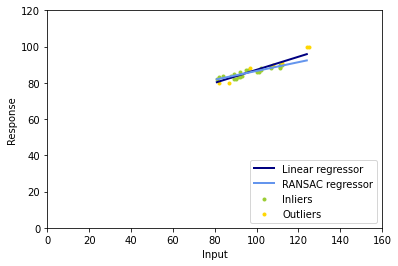

(array([0.24211898]), 62.3497021347013)

In [1082]:
np.random.shuffle(white_points_r)
white_points_r_ss = white_points_r[0:30]

X = white_points_r_ss[:,0].reshape(-1,1)
y = white_points_r_ss[:,1]

regress_and_show(X,y)

0.01743936538696289
Parameters: {'base_estimator': None, 'is_data_valid': None, 'is_model_valid': None, 'loss': 'absolute_loss', 'max_skips': inf, 'max_trials': 100, 'min_samples': None, 'random_state': None, 'residual_threshold': None, 'stop_n_inliers': inf, 'stop_probability': 0.99, 'stop_score': inf}
Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [1.33493869] [1.35105935]


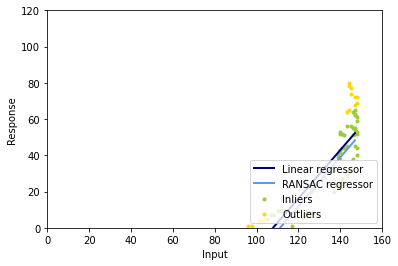

In [1083]:
np.random.shuffle(yellow_points)
yellow_points_ss = yellow_points

X = yellow_points_ss[:,0].reshape(-1,1)
y = yellow_points_ss[:,1]

m, b = regress_and_show(X,y)

In [1084]:
m, b 

(array([1.35105935]), -150.30149021943777)

In [1085]:
intercept_x1 = int(-b/m)
intercept_x2 = int((120-b)/m)
intercept_x1, intercept_x2
x_mid = (intercept_x1+intercept_x2)/2
y_mid = float(x_mid*m+b)
x_mid, y_mid

(155.5, 59.78823901253776)

In [1086]:
c = y_mid + x_mid/m
c

array([174.88310866])

In [1087]:
yi = 30
x_offset=50
x_target = int((yi-b)/m + x_offset)
y_target = int(x_offset*m+b)
x_target, y_target

(183, -82)

In [1088]:
img = cv2.drawMarker(img, (int(x_target), 120-int(y_target)),(0,0,255), markerType=cv2.MARKER_STAR, 
    markerSize=5, thickness=2, line_type=cv2.LINE_AA)
#intercept_x1, intercept_x2
intercept_y1 = 120-int(intercept_x1*m +b)
intercept_y2 = 120-int(intercept_x2*m +b)
img = cv2.line(img, (intercept_x1, intercept_y1), (intercept_x2, intercept_y2),(255,0,0),2)

In [1089]:
intercept_x1_perp = int(-b/m)
intercept_x2_perp = int((120-b)/m)

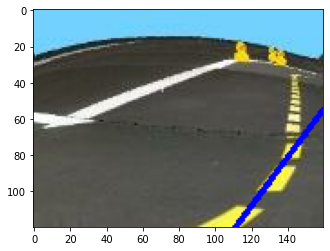

In [1090]:
cv2_plt_imshow(img)